# Visualization Module

This notebook demonstrates how to use the visualization module for time series forecasting predictions, model comparisons, and error analysis.

## Contents
1. Setup and Data Loading
2. Single Model Predictions
3. Multi-Model Comparison
4. Error Analysis
5. Forecast Visualization
6. Complete Dashboard
7. Saving All Plots

## 1. Setup and Data Loading

In [1]:
import sys
import os
sys.path.insert(0, os.path.dirname(os.getcwd()))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import visualization module
from src.visualization import (
    plot_predictions,
    plot_predictions_with_confidence,
    plot_model_comparison,
    plot_metrics_comparison,
    plot_metrics_heatmap,
    plot_error_distribution,
    plot_residuals,
    plot_forecast,
    plot_multi_model_forecast,
    plot_train_test_split,
    plot_evaluation_dashboard,
    save_all_plots
)

# Import evaluation module
from src.evaluation import evaluate_forecast

# Enable inline plots
%matplotlib inline

print("Modules loaded successfully!")

Modules loaded successfully!


In [2]:
# Generate sample data for demonstration
# In practice, you would load your actual model predictions here

np.random.seed(42)
n_samples = 100

# Create date range
dates = pd.date_range(start='2024-01-01', periods=n_samples, freq='D')

# Generate synthetic actual values (random walk with drift)
actuals = 150 + np.cumsum(np.random.randn(n_samples) * 2)

# Simulate predictions from different models (with varying accuracy)
predictions_naive = np.roll(actuals, 1)  # Naive: previous value
predictions_naive[0] = actuals[0]

predictions_arima = actuals + np.random.randn(n_samples) * 3  # ARIMA: small noise
predictions_prophet = actuals + np.random.randn(n_samples) * 4  # Prophet: medium noise
predictions_lstm = actuals + np.random.randn(n_samples) * 5  # LSTM: larger noise

# Create predictions dictionary
predictions_dict = {
    'Naive': predictions_naive,
    'ARIMA': predictions_arima,
    'Prophet': predictions_prophet,
    'LSTM': predictions_lstm
}

print(f"Data shape: {len(actuals)} samples")
print(f"Date range: {dates[0].strftime('%Y-%m-%d')} to {dates[-1].strftime('%Y-%m-%d')}")
print(f"\nModels: {list(predictions_dict.keys())}")

Data shape: 100 samples
Date range: 2024-01-01 to 2024-04-09

Models: ['Naive', 'ARIMA', 'Prophet', 'LSTM']


In [3]:
# Evaluate all models
results_list = []
for model_name, predictions in predictions_dict.items():
    result = evaluate_forecast(actuals, predictions, model_name, verbose=False)
    results_list.append(result)
    print(f"{model_name}: MAE=${result['mae']:.2f}, RMSE=${result['rmse']:.2f}, MAPE={result['mape']:.2f}%")

Naive: MAE=$1.44, RMSE=$1.82, MAPE=1.05%
ARIMA: MAE=$2.27, RMSE=$2.85, MAPE=1.66%
Prophet: MAE=$3.42, RMSE=$4.32, MAPE=2.50%
LSTM: MAE=$3.54, RMSE=$4.43, MAPE=2.60%


## 2. Single Model Predictions

Plot actual vs predicted values for a single model.

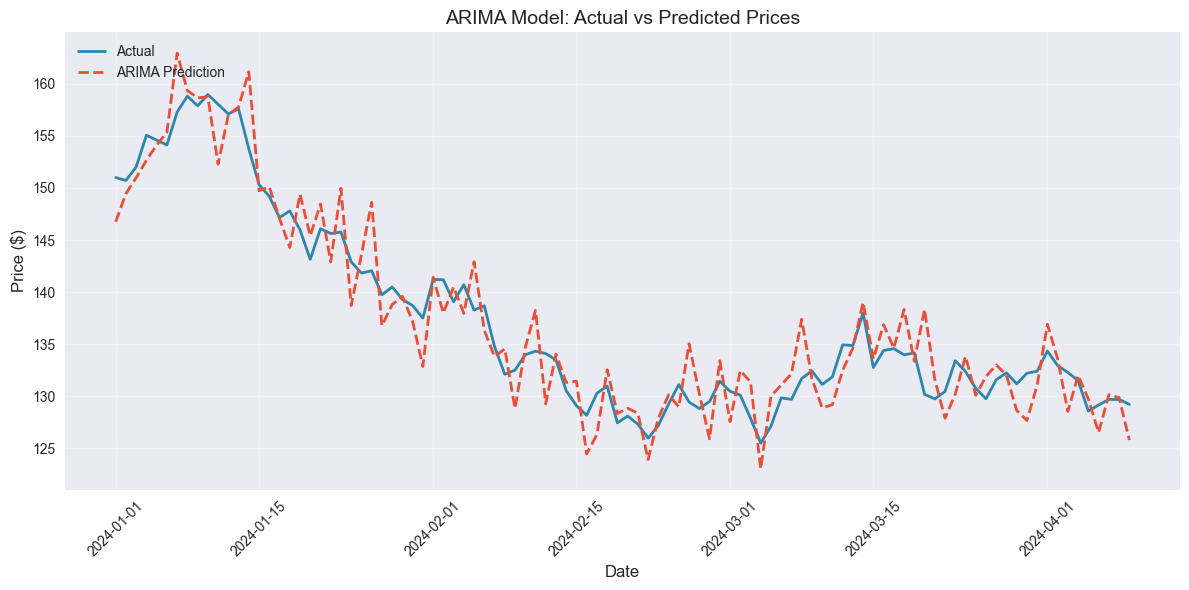

In [4]:
# Basic prediction plot
plot_predictions(
    actuals=actuals,
    predictions=predictions_arima,
    dates=dates,
    model_name="ARIMA",
    title="ARIMA Model: Actual vs Predicted Prices"
);

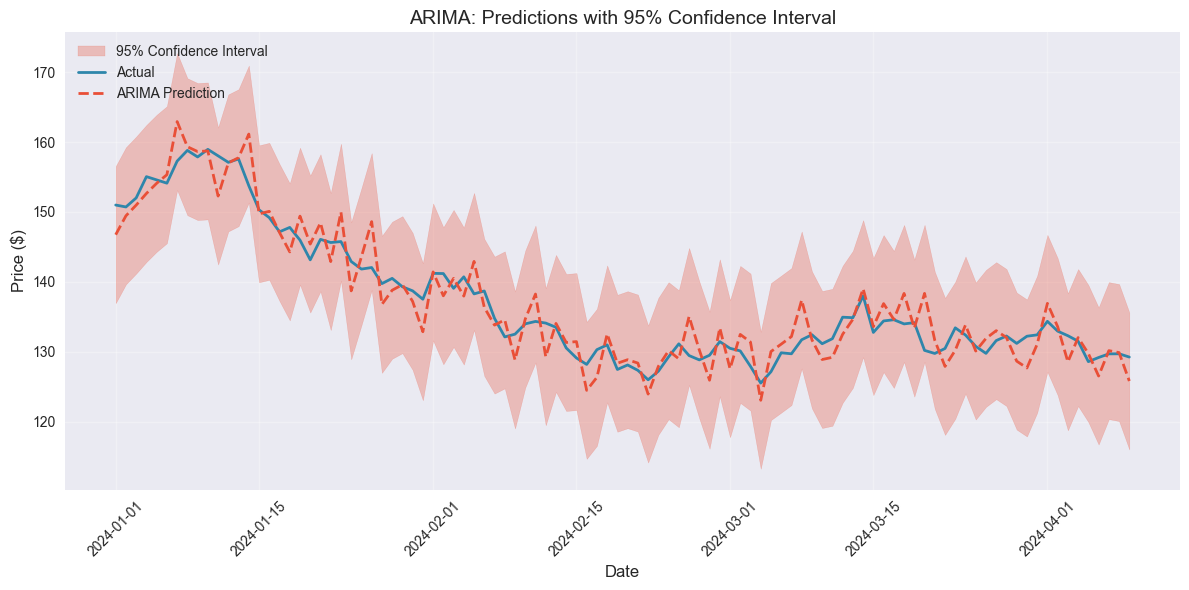

In [5]:
# Prediction with confidence intervals
# Simulate confidence bounds
std_error = 5
lower_bound = predictions_arima - 1.96 * std_error
upper_bound = predictions_arima + 1.96 * std_error

plot_predictions_with_confidence(
    actuals=actuals,
    predictions=predictions_arima,
    lower_bound=lower_bound,
    upper_bound=upper_bound,
    dates=dates,
    model_name="ARIMA",
    confidence_level=0.95
);

## 3. Multi-Model Comparison

Compare predictions from multiple models on the same chart.

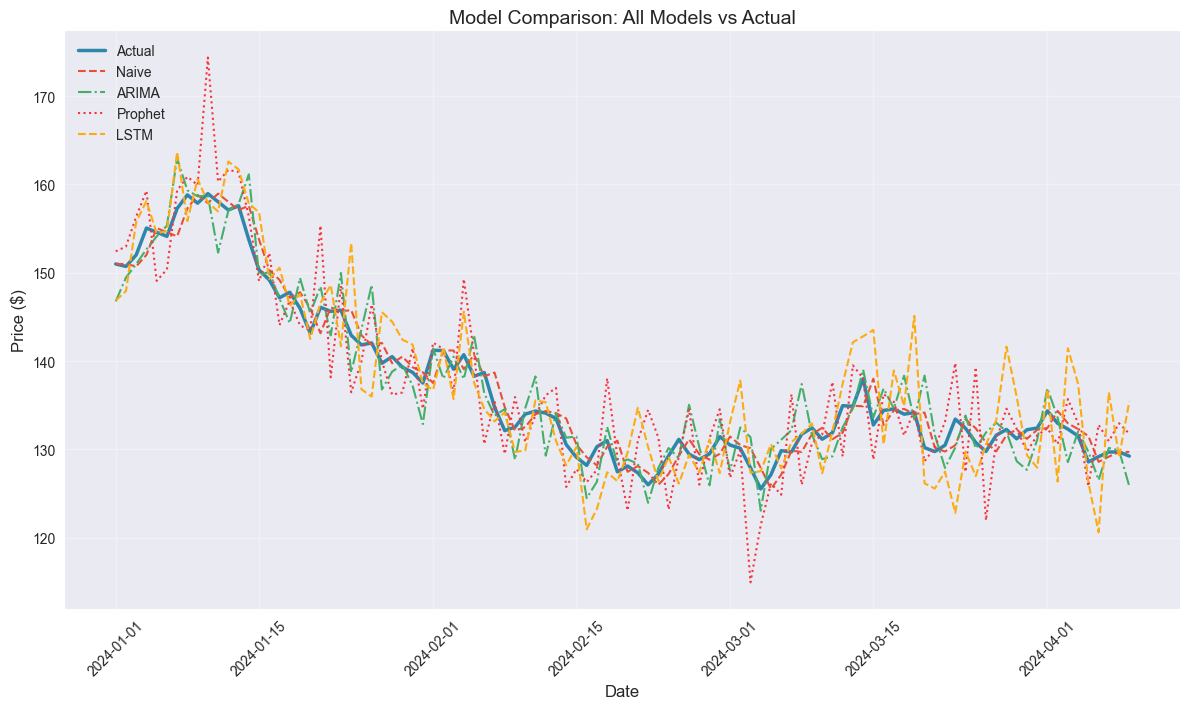

In [6]:
# Compare all models on one plot
plot_model_comparison(
    actuals=actuals,
    predictions_dict=predictions_dict,
    dates=dates,
    title="Model Comparison: All Models vs Actual"
);

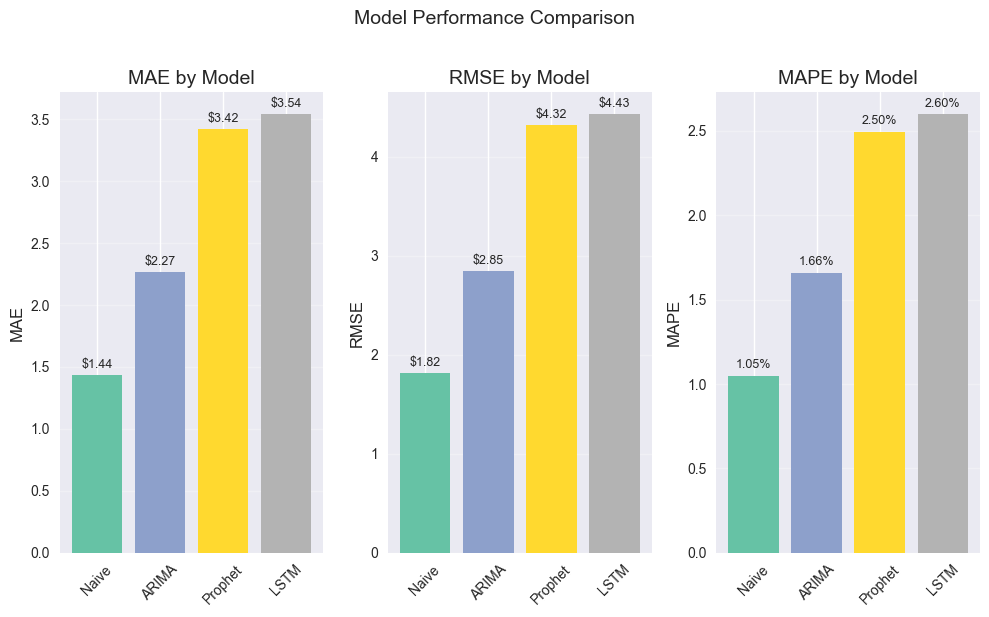

In [7]:
# Compare metrics with bar charts
plot_metrics_comparison(
    results_list=results_list,
    metrics=['mae', 'rmse', 'mape']
);

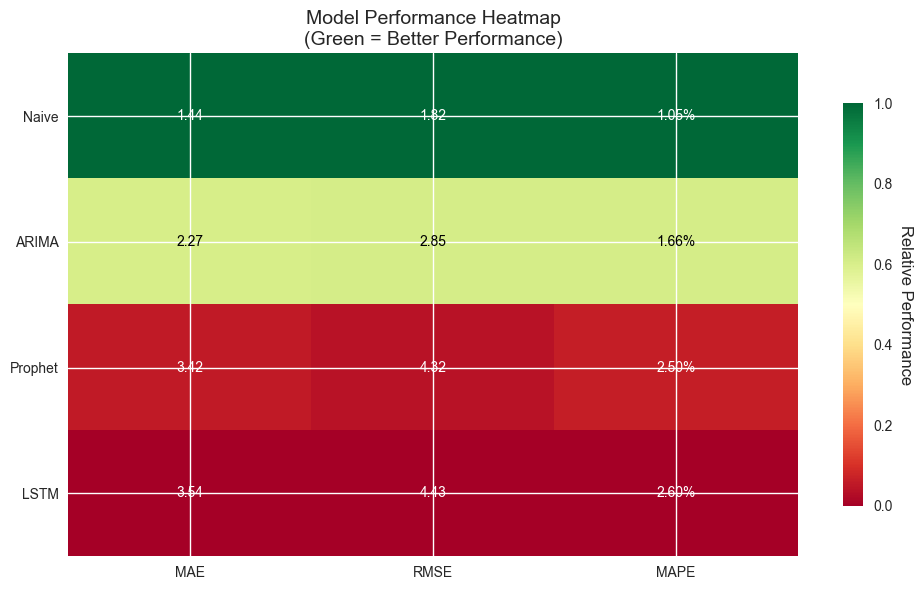

In [8]:
# Metrics heatmap (green = better performance)
plot_metrics_heatmap(
    results_list=results_list,
    metrics=['mae', 'rmse', 'mape']
);

## 4. Error Analysis

Analyze prediction errors in detail.

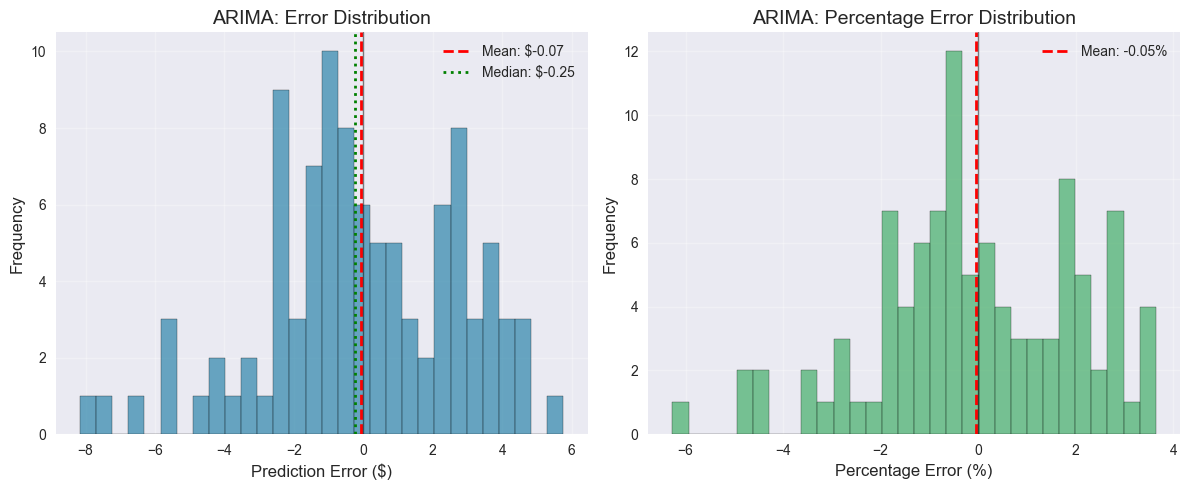

In [9]:
# Error distribution histogram
plot_error_distribution(
    actuals=actuals,
    predictions=predictions_arima,
    model_name="ARIMA"
);

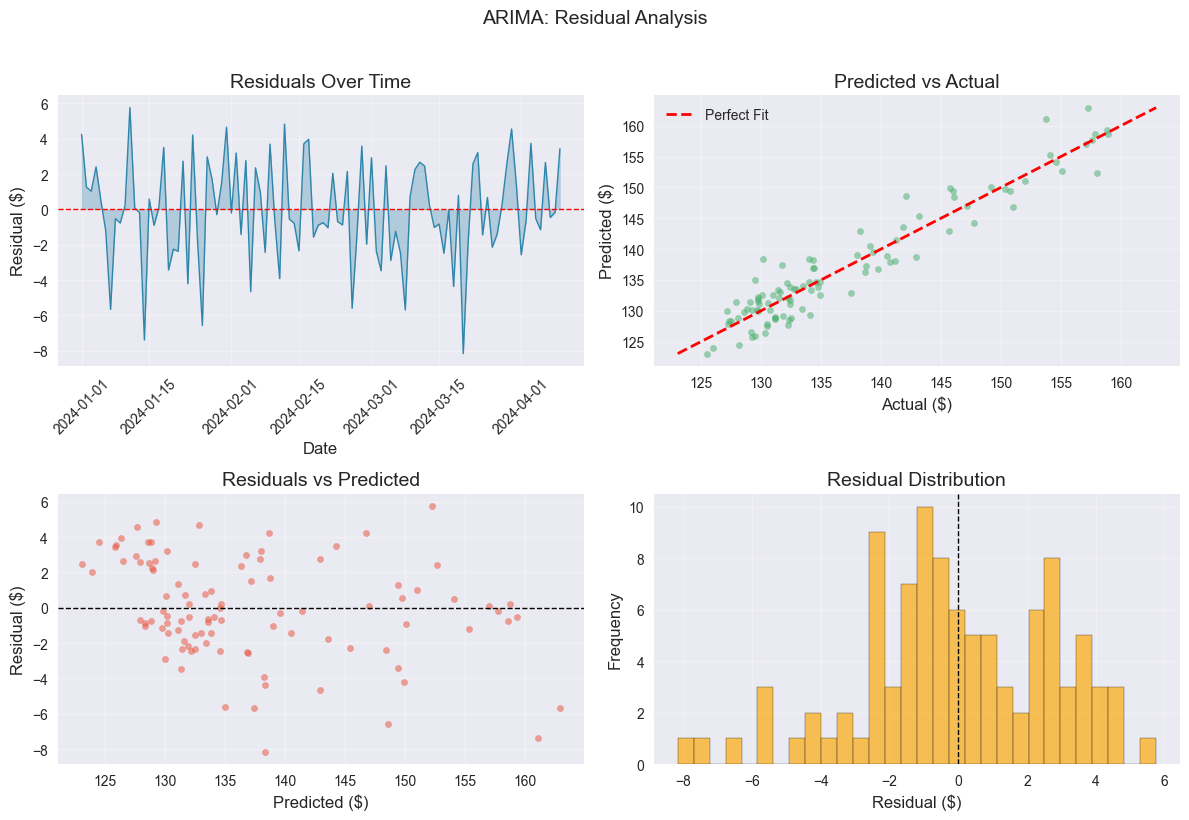

In [10]:
# Comprehensive residual analysis (4-panel plot)
plot_residuals(
    actuals=actuals,
    predictions=predictions_arima,
    dates=dates,
    model_name="ARIMA"
);

## 5. Forecast Visualization

Visualize historical data with future forecasts.

In [11]:
# Simulate a future forecast scenario
n_forecast = 20
historical = actuals
historical_dates = dates

# Generate future dates
forecast_dates = pd.date_range(start=dates[-1] + pd.Timedelta(days=1), periods=n_forecast, freq='D')

# Simulate forecast (continuing the trend)
last_value = actuals[-1]
trend = np.mean(np.diff(actuals[-20:]))
forecast = last_value + np.cumsum(np.ones(n_forecast) * trend + np.random.randn(n_forecast) * 2)

# Confidence bounds for forecast
forecast_std = np.linspace(3, 8, n_forecast)  # Increasing uncertainty
forecast_lower = forecast - 1.96 * forecast_std
forecast_upper = forecast + 1.96 * forecast_std

print(f"Forecast period: {forecast_dates[0].strftime('%Y-%m-%d')} to {forecast_dates[-1].strftime('%Y-%m-%d')}")

Forecast period: 2024-04-10 to 2024-04-29


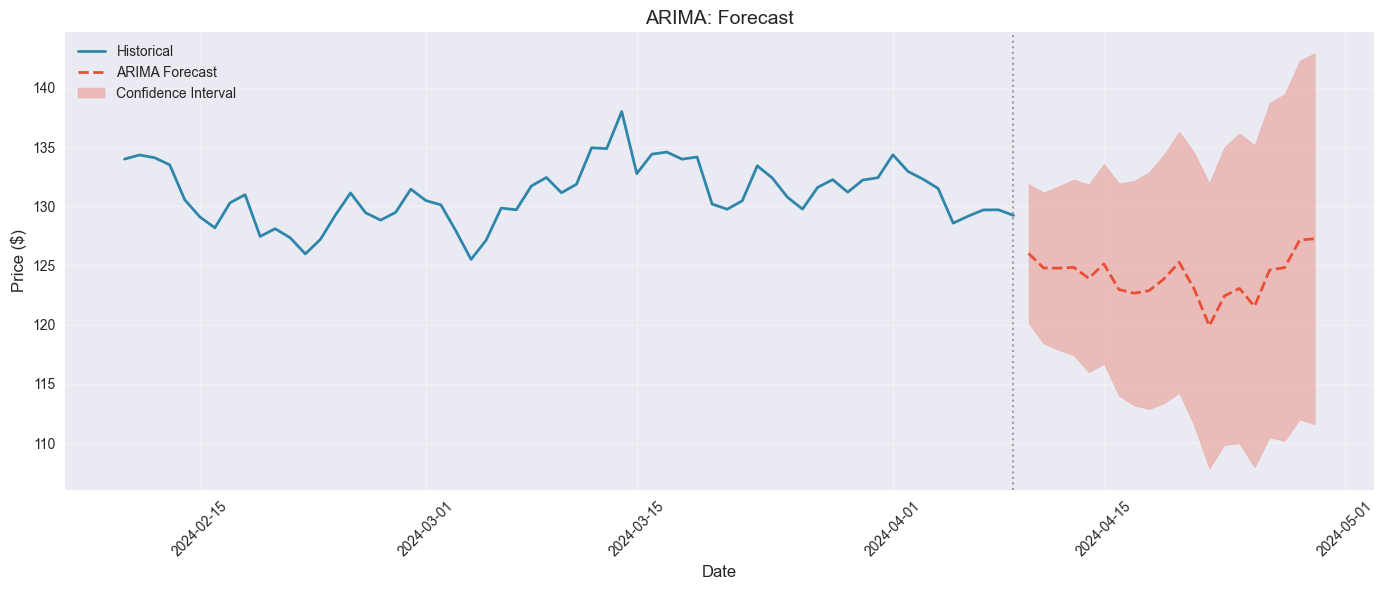

In [12]:
# Single model forecast
plot_forecast(
    historical=historical,
    forecast=forecast,
    historical_dates=historical_dates,
    forecast_dates=forecast_dates,
    lower_bound=forecast_lower,
    upper_bound=forecast_upper,
    model_name="ARIMA",
    n_historical=60  # Show last 60 days of historical data
);

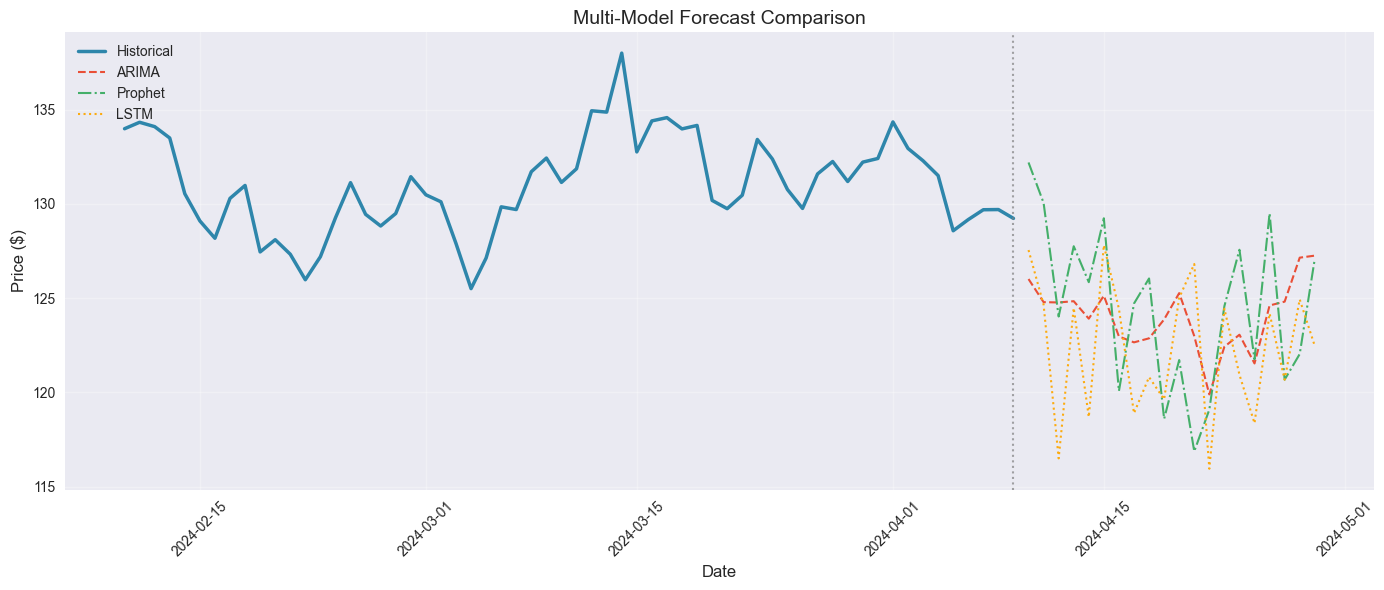

In [13]:
# Multi-model forecast comparison
forecasts_dict = {
    'ARIMA': forecast,
    'Prophet': forecast + np.random.randn(n_forecast) * 3,
    'LSTM': forecast + np.random.randn(n_forecast) * 4
}

plot_multi_model_forecast(
    historical=historical,
    forecasts_dict=forecasts_dict,
    historical_dates=historical_dates,
    forecast_dates=forecast_dates,
    n_historical=60
);

## 6. Train/Test Split Visualization

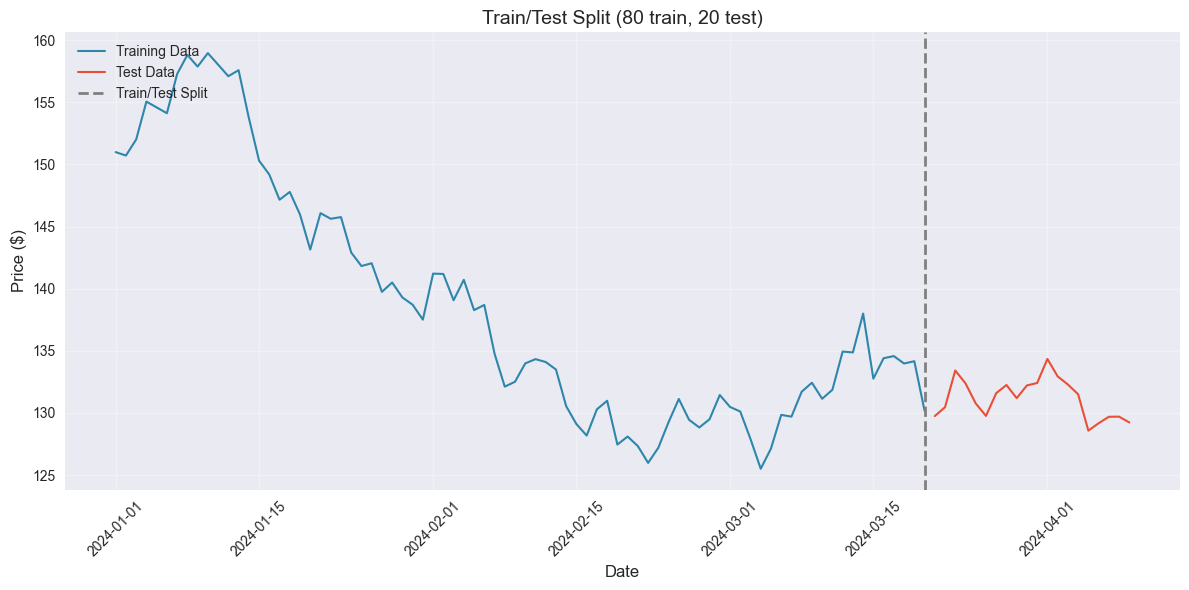

In [14]:
# Visualize train/test split
split_idx = int(len(actuals) * 0.8)

train_data = actuals[:split_idx]
test_data = actuals[split_idx:]
train_dates = dates[:split_idx]
test_dates = dates[split_idx:]

plot_train_test_split(
    train_data=train_data,
    test_data=test_data,
    train_dates=train_dates,
    test_dates=test_dates
);

## 7. Complete Evaluation Dashboard

A comprehensive 6-panel dashboard showing all key visualizations.

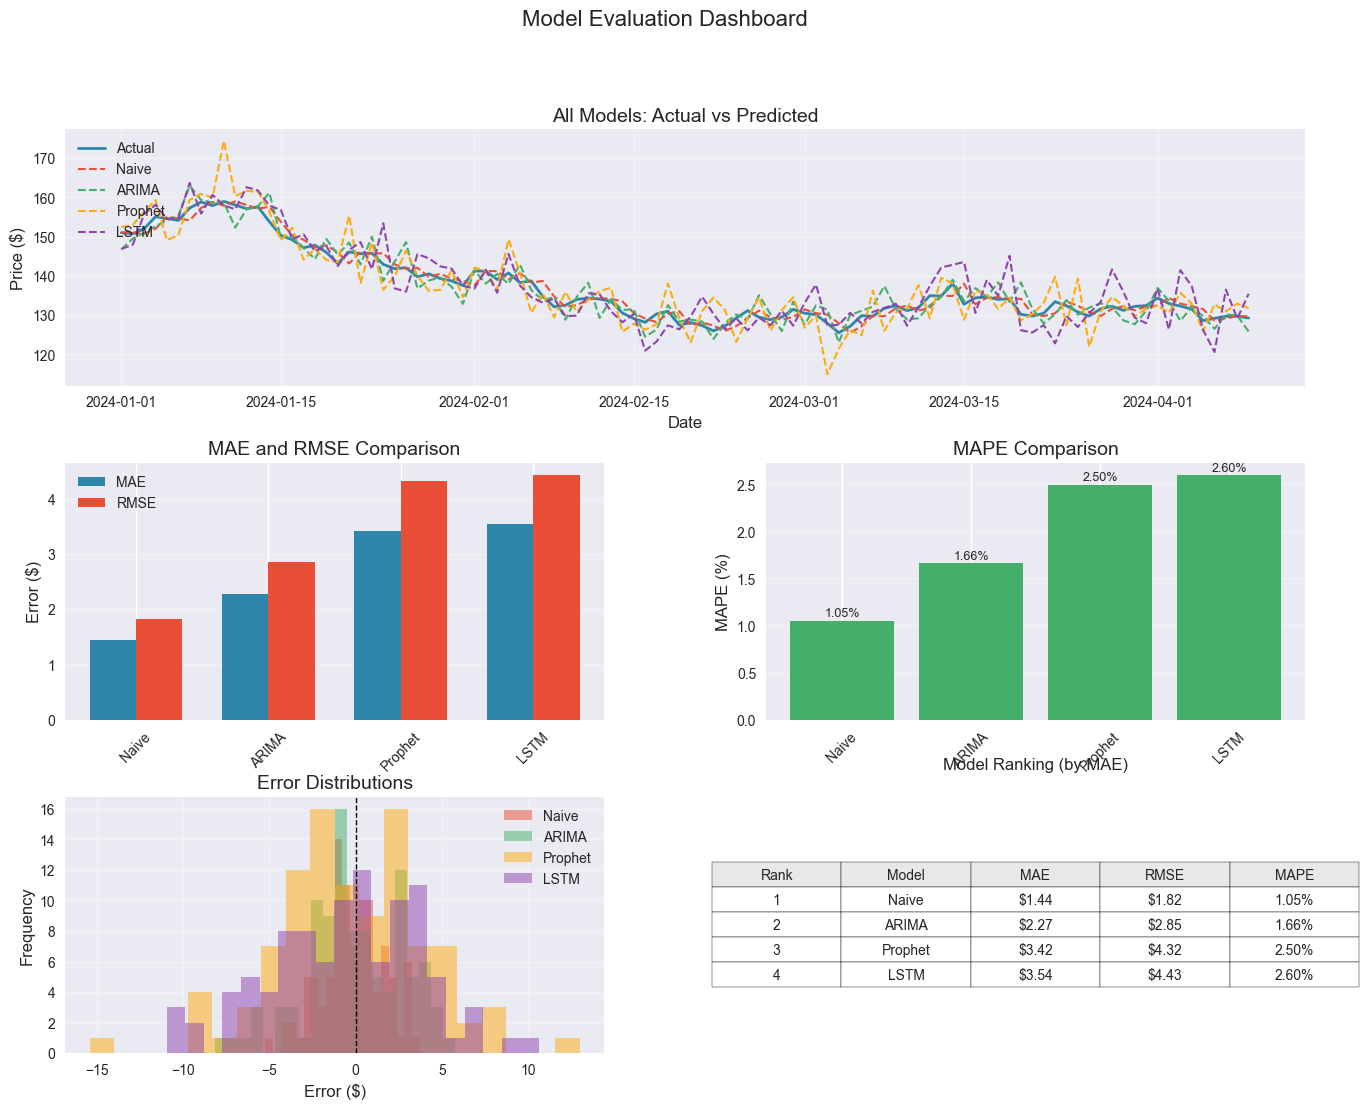

In [15]:
# Generate complete dashboard
plot_evaluation_dashboard(
    actuals=actuals,
    predictions_dict=predictions_dict,
    results_list=results_list,
    dates=dates,
    figsize=(16, 12)
);

## 8. Saving All Plots

Save all standard visualizations to files at once.

Plot saved to: ../plots\model_comparison.png
Plot saved to: ../plots\metrics_comparison.png
Plot saved to: ../plots\metrics_heatmap.png
Plot saved to: ../plots\evaluation_dashboard.png
Plot saved to: ../plots\naive_predictions.png
Plot saved to: ../plots\naive_errors.png
Plot saved to: ../plots\naive_residuals.png
Plot saved to: ../plots\arima_predictions.png
Plot saved to: ../plots\arima_errors.png
Plot saved to: ../plots\arima_residuals.png
Plot saved to: ../plots\prophet_predictions.png
Plot saved to: ../plots\prophet_errors.png
Plot saved to: ../plots\prophet_residuals.png
Plot saved to: ../plots\lstm_predictions.png
Plot saved to: ../plots\lstm_errors.png
Plot saved to: ../plots\lstm_residuals.png

All plots saved to: ../plots/
Total plots generated: 16

Saved plots:
  model_comparison: ../plots\model_comparison.png
  metrics_comparison: ../plots\metrics_comparison.png
  metrics_heatmap: ../plots\metrics_heatmap.png
  dashboard: ../plots\evaluation_dashboard.png
  naive_prediction

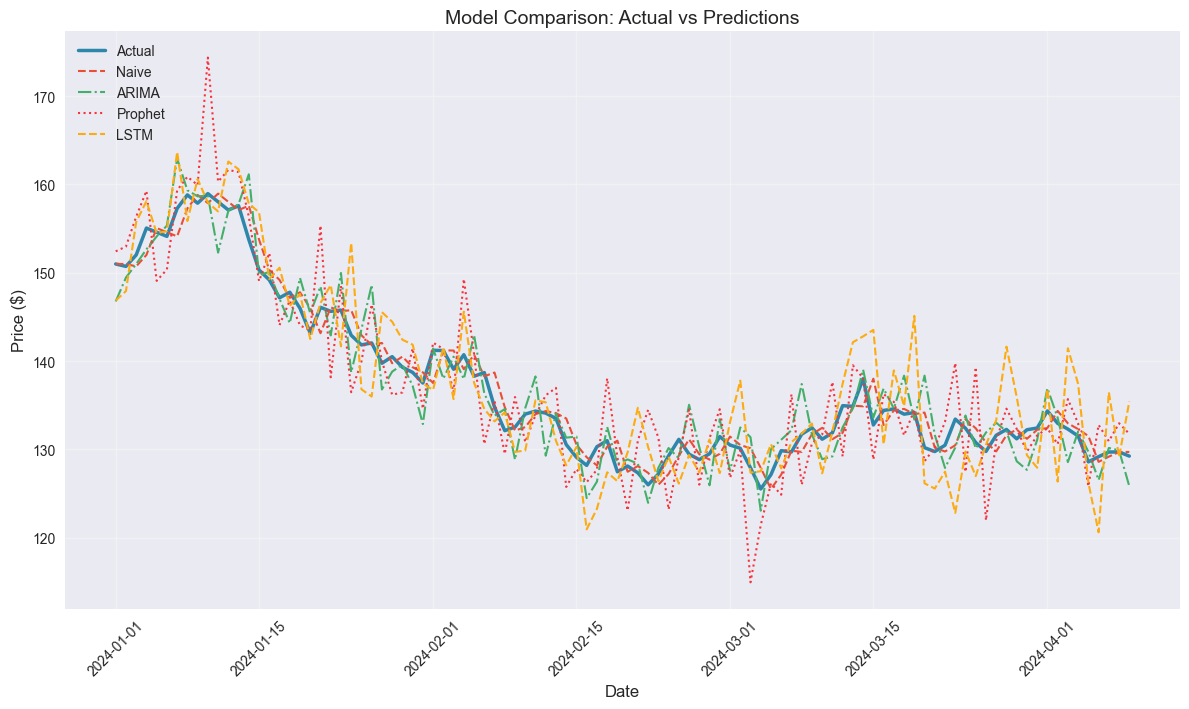

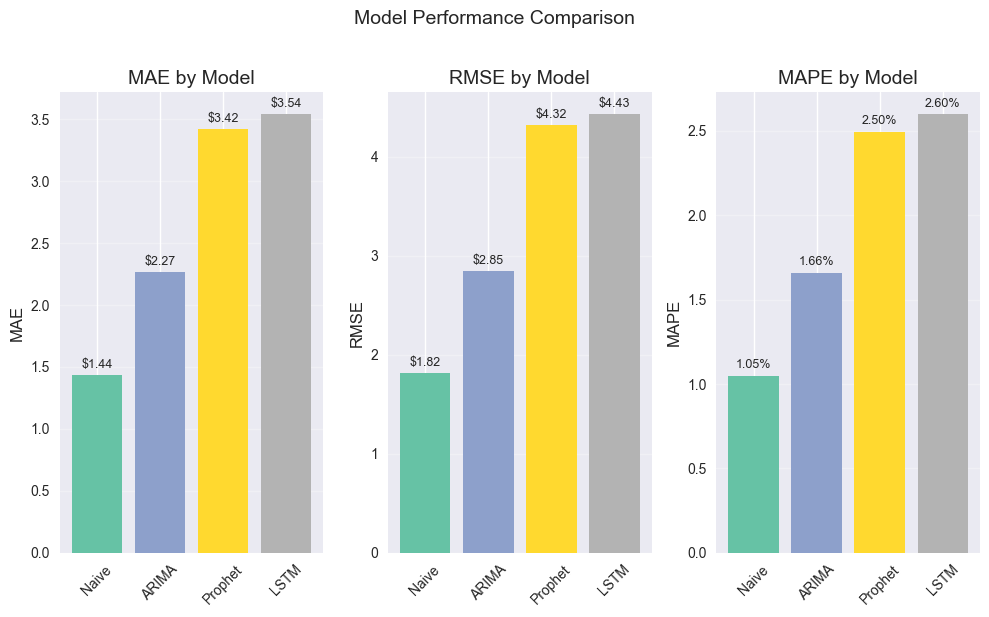

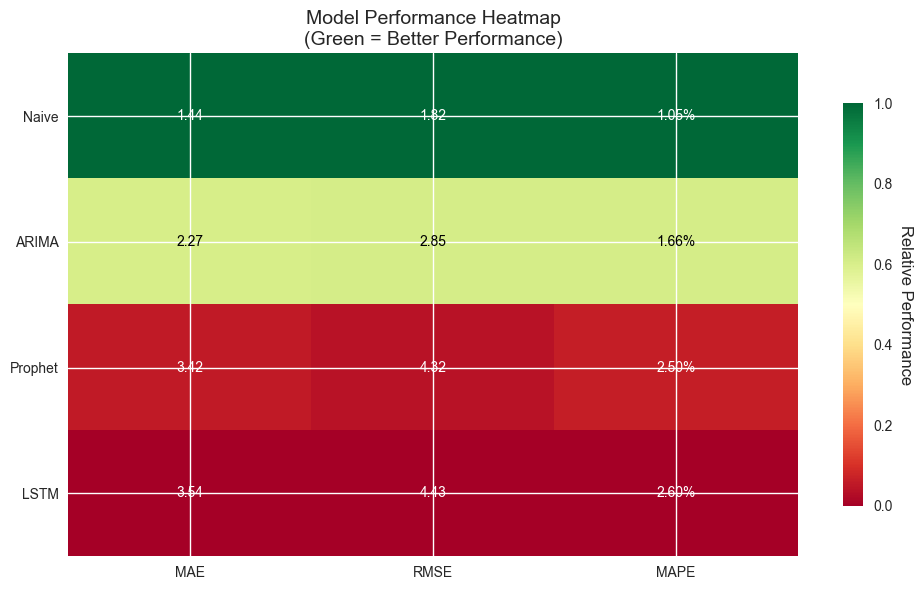

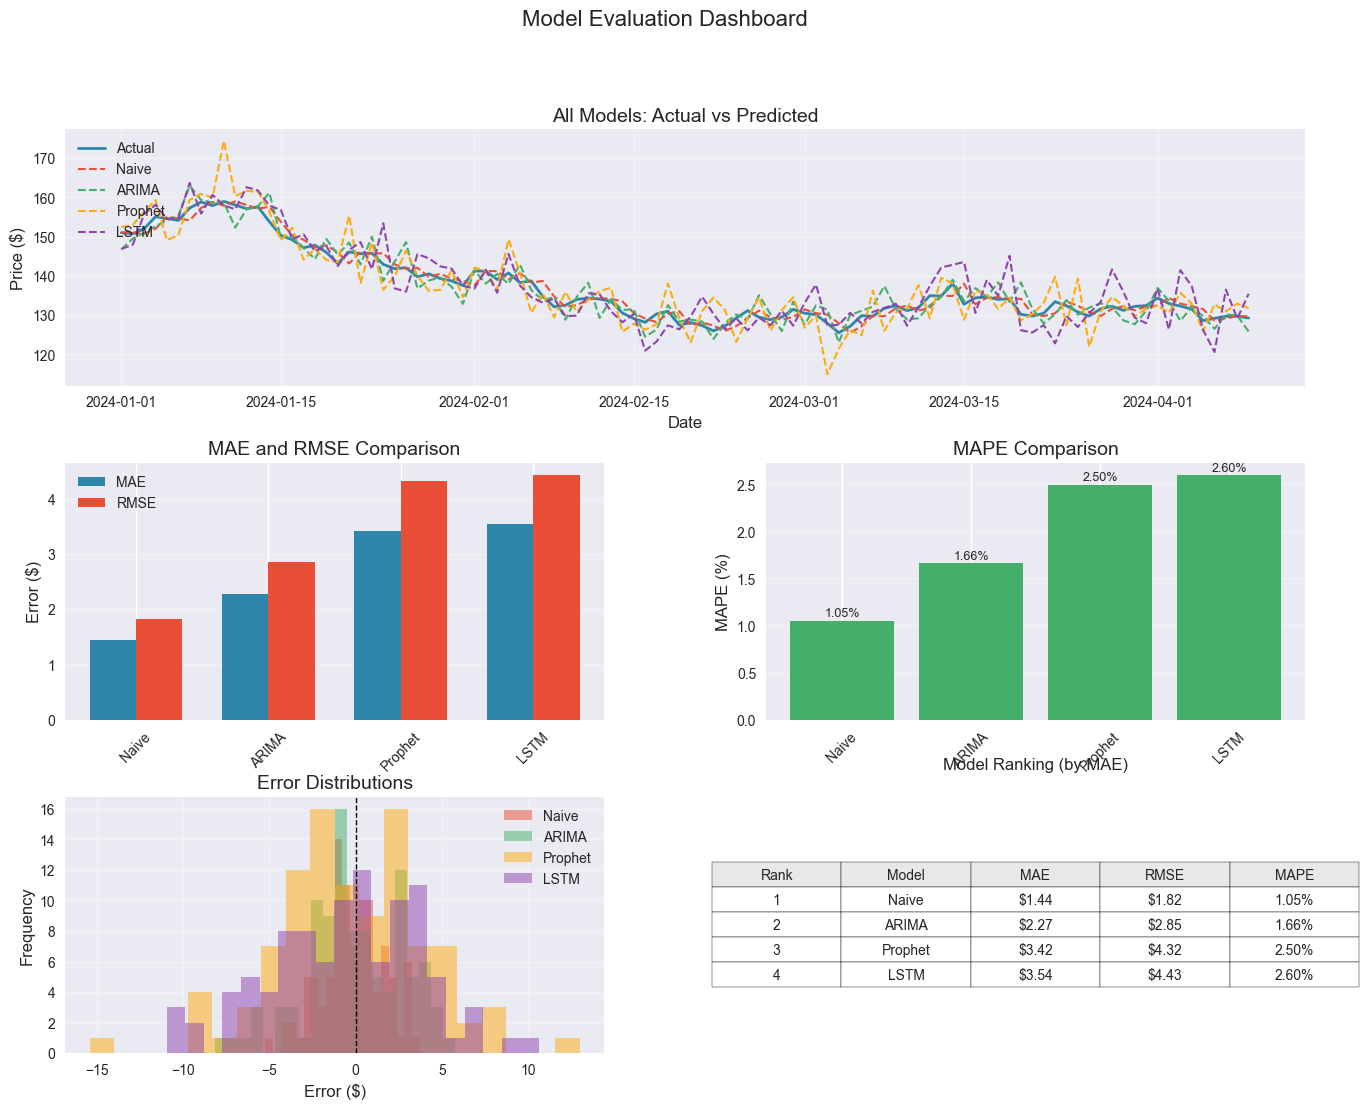

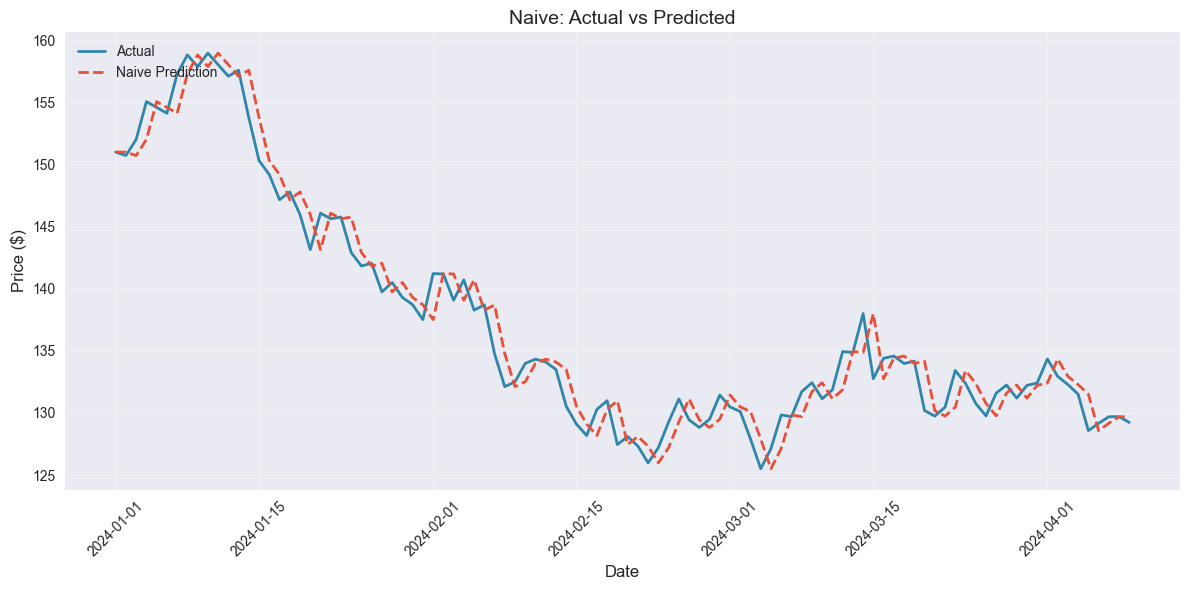

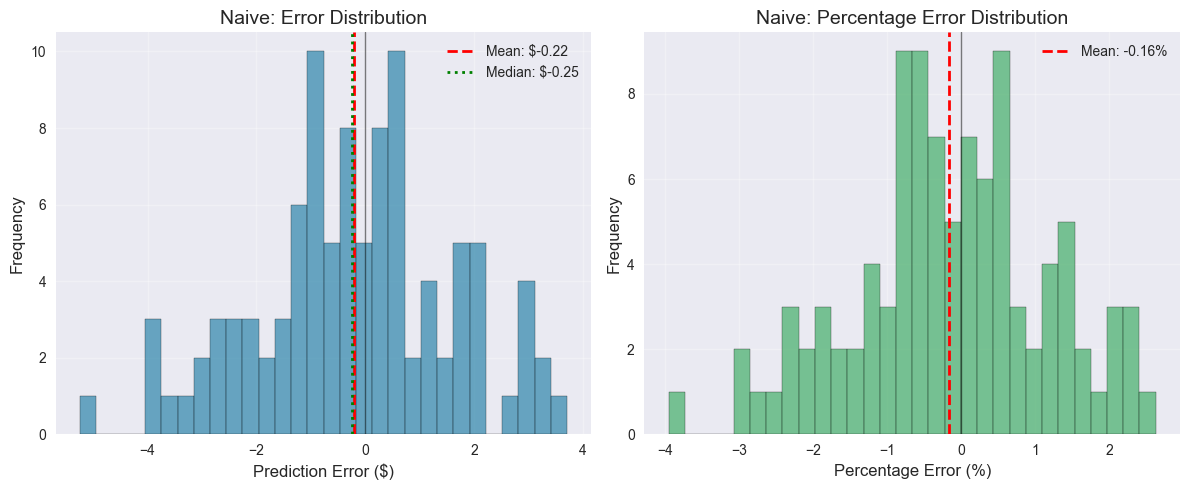

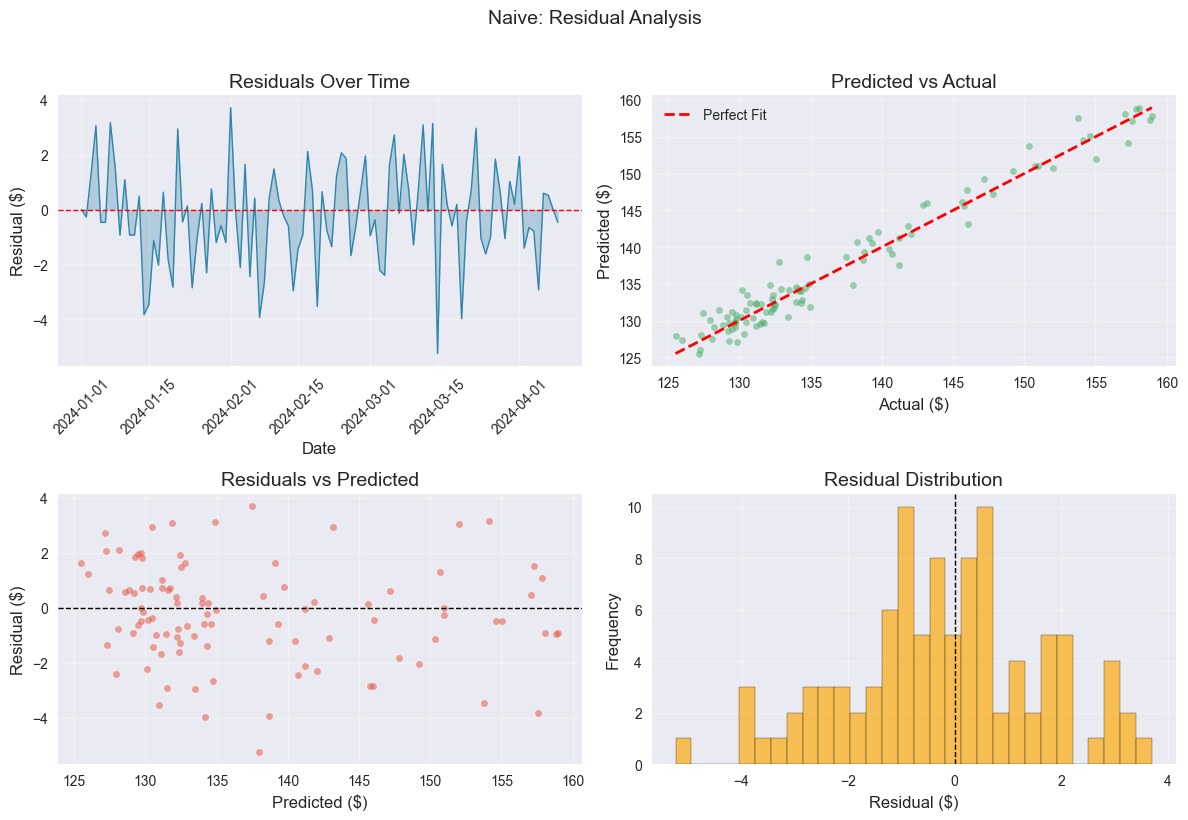

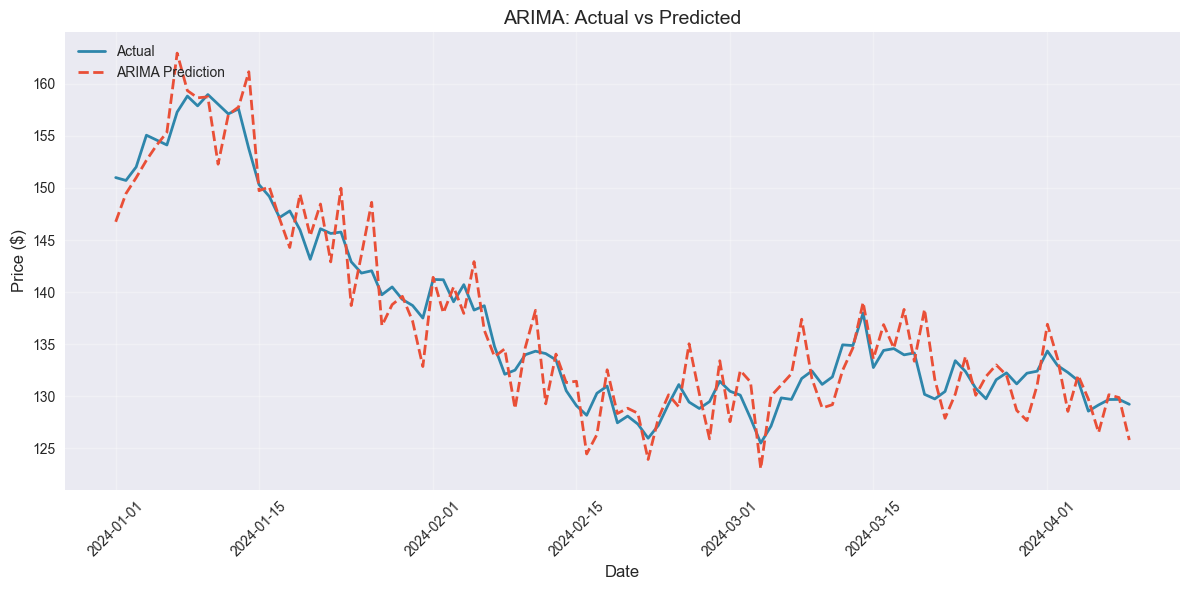

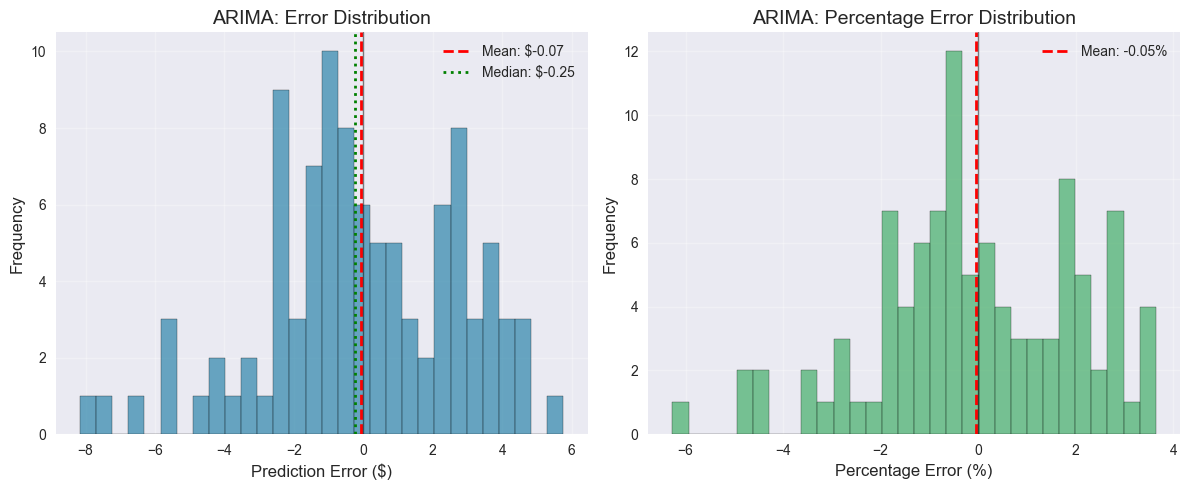

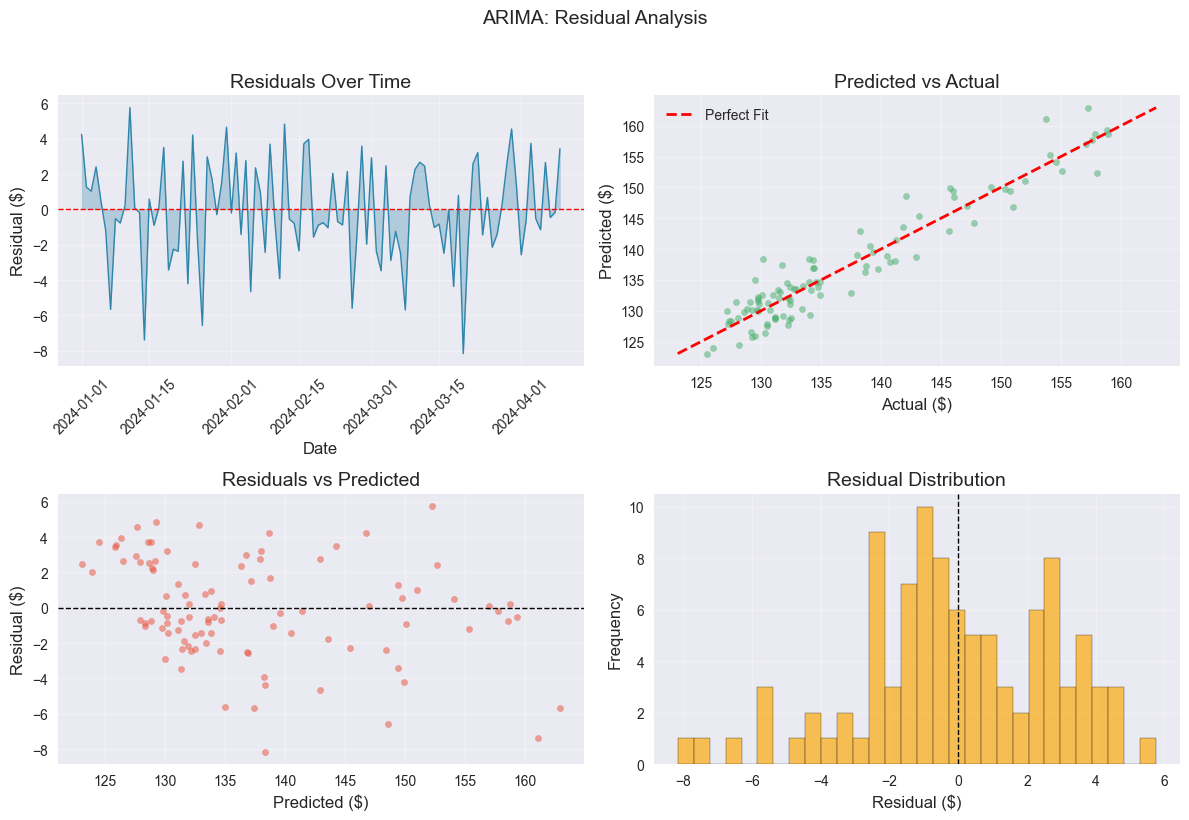

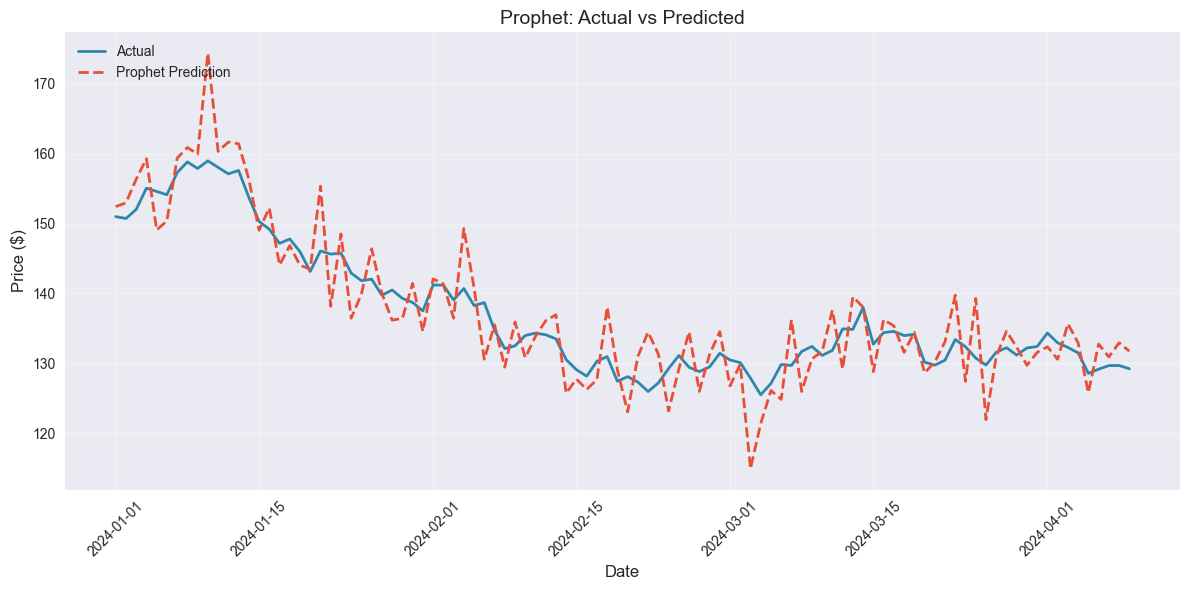

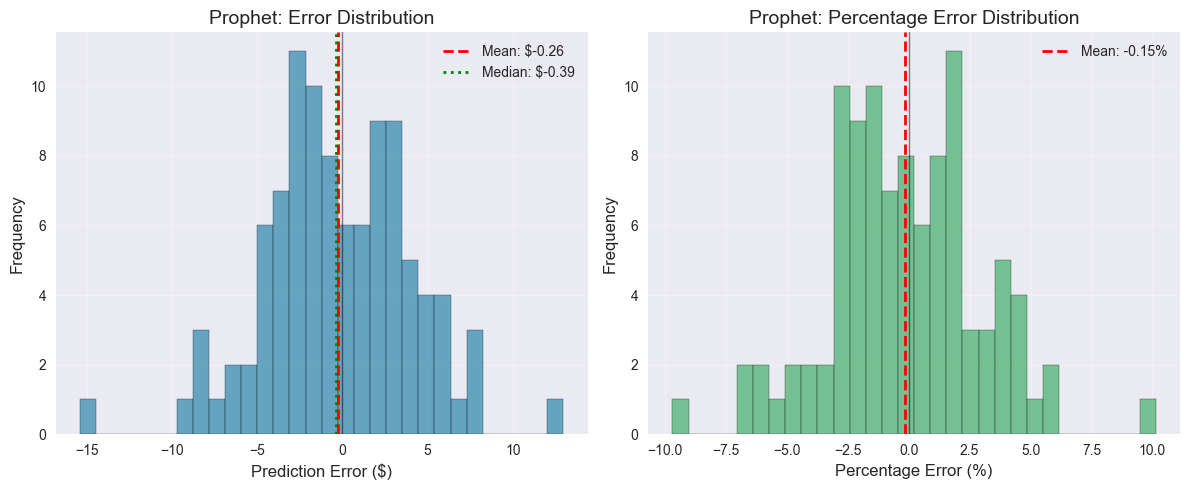

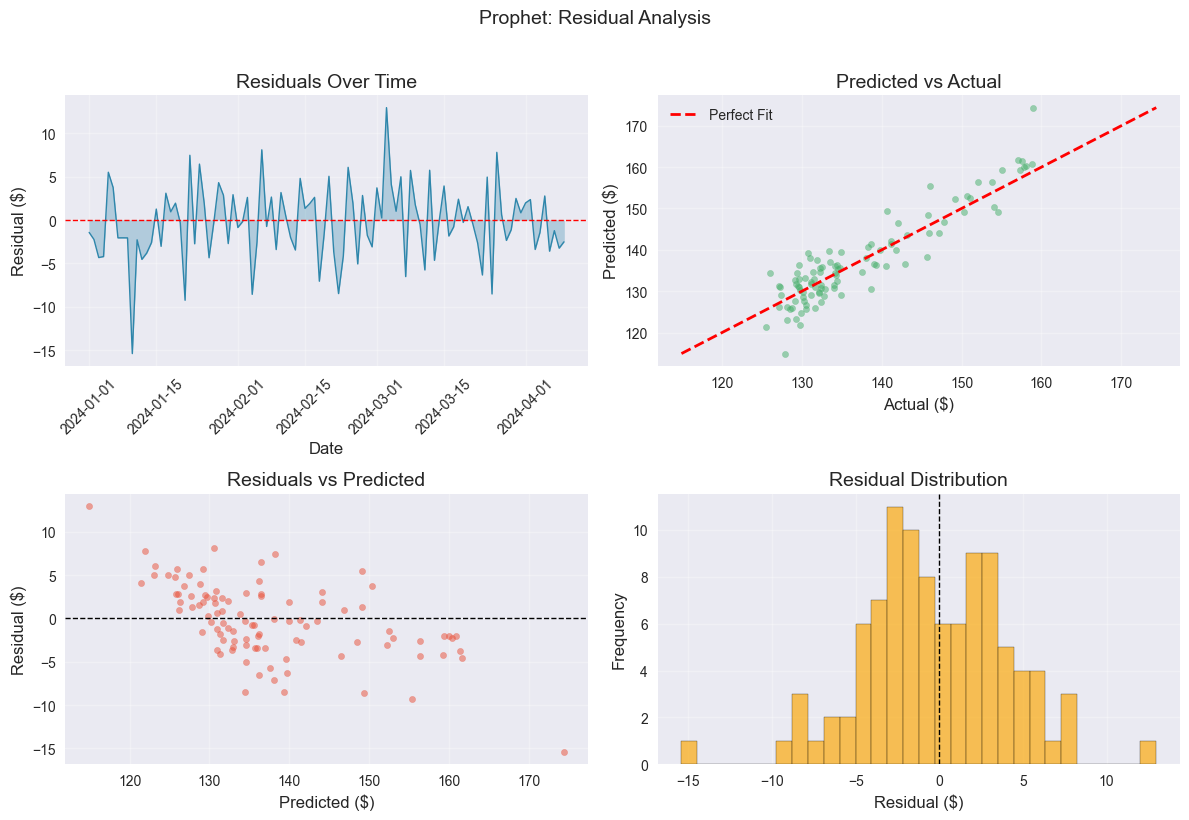

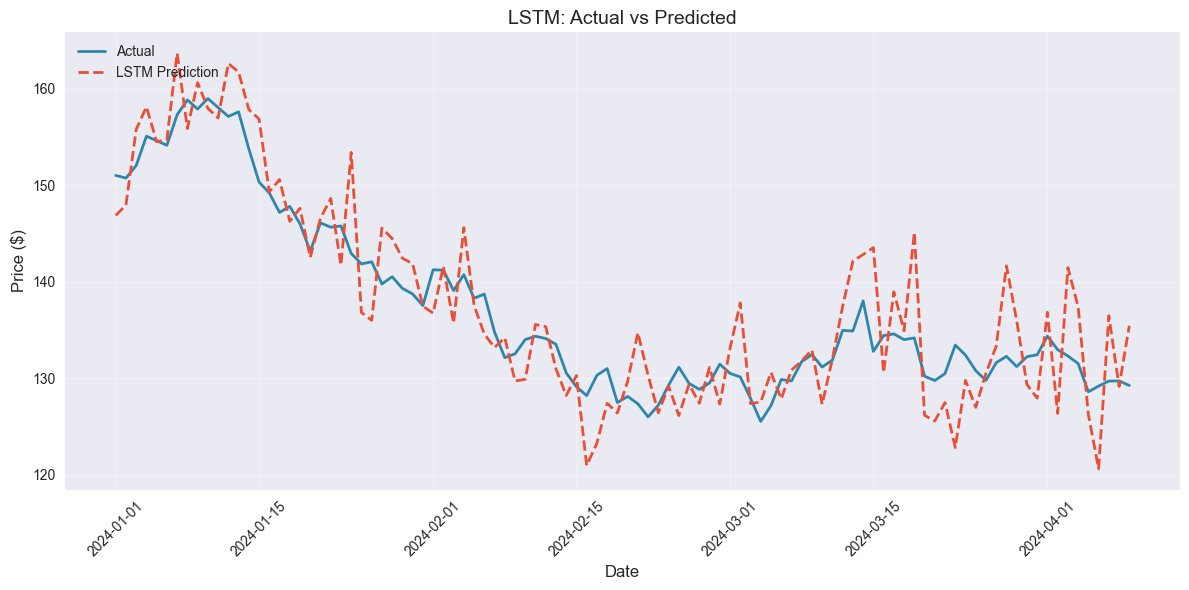

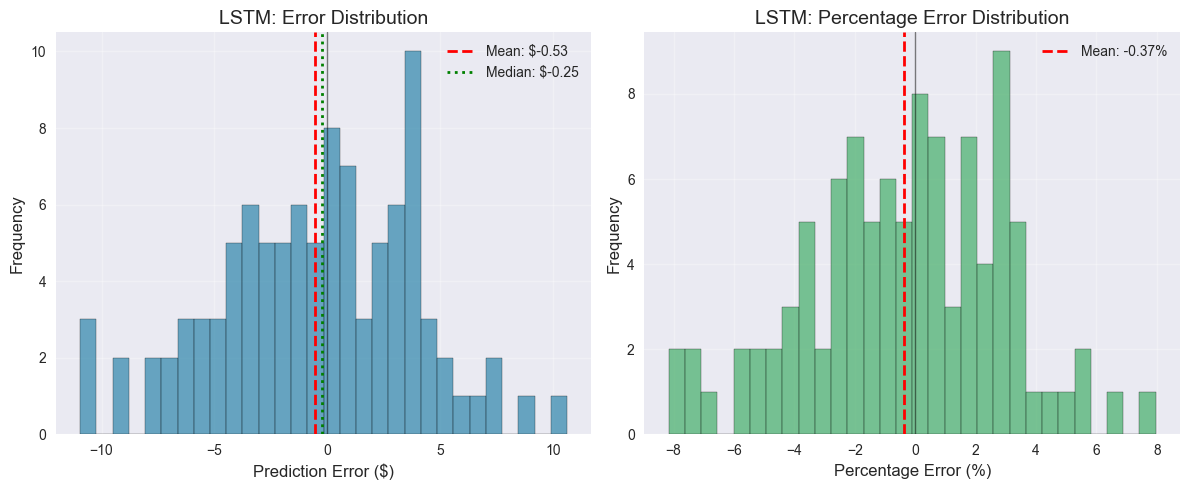

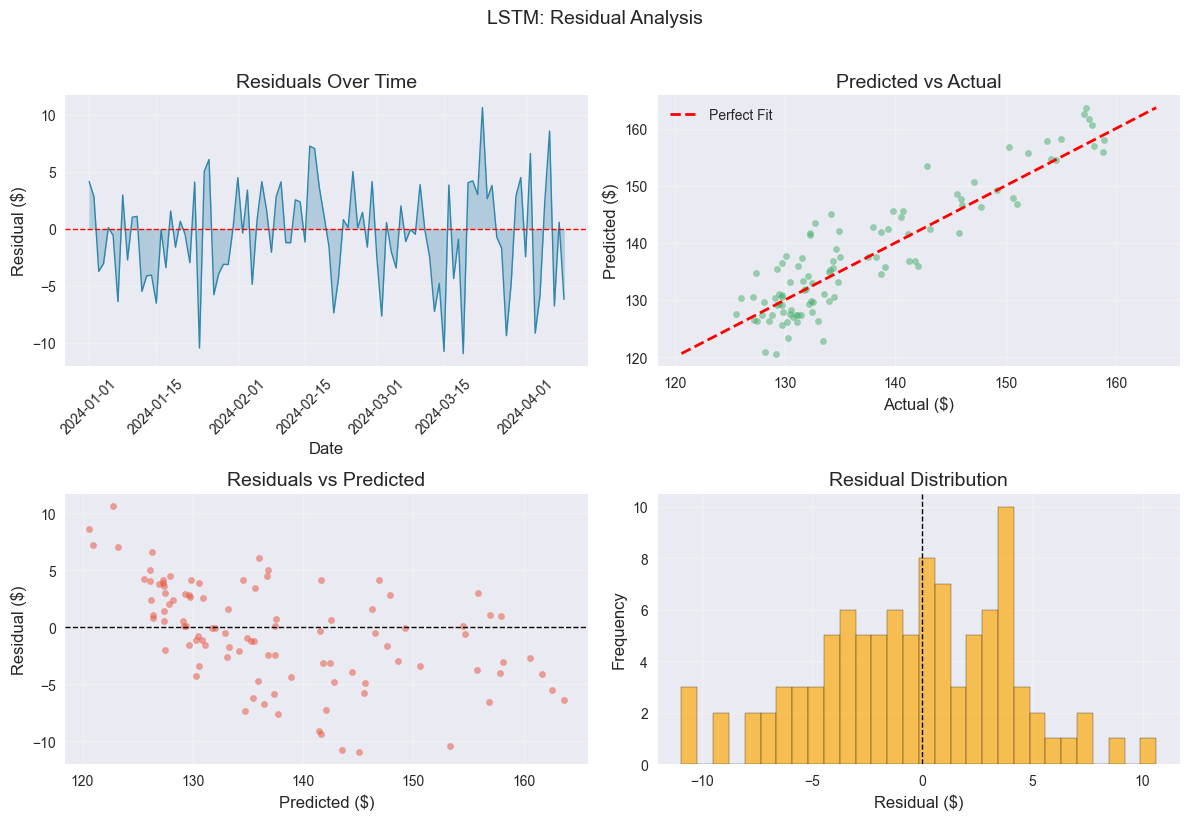

In [16]:
# Save all plots to the plots directory
saved_paths = save_all_plots(
    actuals=actuals,
    predictions_dict=predictions_dict,
    results_list=results_list,
    dates=dates,
    output_dir='../plots',
    show_plots=False  # Set to True to also display
)

print("\nSaved plots:")
for name, path in saved_paths.items():
    print(f"  {name}: {path}")

## Summary

The visualization module provides:

| Function | Purpose |
|----------|--------|
| `plot_predictions()` | Single model actual vs predicted |
| `plot_predictions_with_confidence()` | Predictions with confidence intervals |
| `plot_model_comparison()` | Multiple models on one chart |
| `plot_metrics_comparison()` | Bar chart comparing MAE, RMSE, MAPE |
| `plot_metrics_heatmap()` | Heatmap of model performance |
| `plot_error_distribution()` | Error histograms |
| `plot_residuals()` | 4-panel residual analysis |
| `plot_forecast()` | Historical + future forecast |
| `plot_multi_model_forecast()` | Multiple model forecasts |
| `plot_train_test_split()` | Train/test data split |
| `plot_evaluation_dashboard()` | Complete 6-panel dashboard |
| `save_all_plots()` | Save all plots to files |